In [2]:
pip install tweepy

  Using cached tweepy-3.9.0-py2.py3-none-any.whl (30 kB)
  Using cached requests_oauthlib-1.3.0-py2.py3-none-any.whl (23 kB)
  Using cached oauthlib-3.1.0-py2.py3-none-any.whl (147 kB)
  Using cached PySocks-1.7.1-py3-none-any.whl (16 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
# make readme explain what sentiment analysis is 
import tweepy as tw
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os

## Authenticate to Twitter

In [4]:
consumer_key = os.environ.get('TWTR_API_KEY')
consumer_secret = os.environ.get('TWTR_SECRET_KEY')
access_token = os.environ.get('TWTR_ACC_TOKEN')
access_token_secret = os.environ.get('TWTR_ACC_TOKEN_SECRET')

In [5]:
# Authenticate
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

## Get Tweets

In [47]:
hashtag = '#presidentialdebate'
query = tw.Cursor(api.search, q=hashtag).items(1000)
tweets = [{'Tweets': tweet.text, 'Timestamp': tweet.created_at} for tweet in query]
print(tweets)

[{'Tweets': 'RT @RealButterShow: Run Zombie RUN! The Buttercast kicks off #Halloween2020 with the Top 5 FAST #ZOMBIE MOVIES, a #PresidentialDebate, &amp; hi…', 'Timestamp': datetime.datetime(2020, 11, 11, 19, 46, 53)}, {'Tweets': 'Not all the ballots have been counted and there are still cases to be heard in court. #2020election #ChrisWallace… https://t.co/JtP3jniEYt', 'Timestamp': datetime.datetime(2020, 11, 11, 18, 12, 3)}, {'Tweets': 'You Specifically Said in the 1st #PresidentialDebate @realDonaldTrump “Military all setup,Logistically all setup, w… https://t.co/USiY6LncaD', 'Timestamp': datetime.datetime(2020, 11, 11, 15, 11, 12)}, {'Tweets': '&amp; what did u said during the #PresidentialDebate @realDonaldTrump ?? @JoeBiden @KamalaHarris @VP @BarackObama… https://t.co/GmL2Wm6WU1', 'Timestamp': datetime.datetime(2020, 11, 11, 12, 3, 11)}, {'Tweets': 'RT @Matt_VanDyke: I heard great things about #KristenWelker when I was dating her cousin a few years ago, but last night I saw for my

In [48]:
df = pd.DataFrame.from_dict(tweets)
df.head()

Tweets           Timestamp
0  RT @RealButterShow: Run Zombie RUN! The Butter... 2020-11-11 19:46:53
1  Not all the ballots have been counted and ther... 2020-11-11 18:12:03
2  You Specifically Said in the 1st #Presidential... 2020-11-11 15:11:12
3  &amp; what did u said during the #Presidential... 2020-11-11 12:03:11
4  RT @Matt_VanDyke: I heard great things about #... 2020-11-11 11:25:44

In [51]:
trump_refs = ['DonaldTrump', 'Donald Trump', 'Donald', 'Trump', 'Trump\'s']
biden_refs = ['JoeBiden', 'Joe Biden', 'Joe', 'Biden', 'Biden\'s']

In [52]:
# want to indicate if the tweet mentions biden or trump
def identify_subject(tweet, refs):
    flag = 0
    for ref in refs:
        if tweet.find(ref) != -1:
            flag = 1
    return flag

df['Trump'] = df['Tweets'].apply(lambda x: identify_subject(x, trump_refs))
df['Biden'] = df['Tweets'].apply(lambda x: identify_subject(x, biden_refs))

In [53]:
df.head()

Tweets           Timestamp  \
0  RT @RealButterShow: Run Zombie RUN! The Butter... 2020-11-11 19:46:53   
1  Not all the ballots have been counted and ther... 2020-11-11 18:12:03   
2  You Specifically Said in the 1st #Presidential... 2020-11-11 15:11:12   
3  &amp; what did u said during the #Presidential... 2020-11-11 12:03:11   
4  RT @Matt_VanDyke: I heard great things about #... 2020-11-11 11:25:44   

   Trump  Biden  
0      0      0  
1      0      0  
2      1      0  
3      1      1  
4      0      0

In [54]:
df[df['Biden'] == 1]

Tweets           Timestamp  \
3    &amp; what did u said during the #Presidential... 2020-11-11 12:03:11   
5    RT @nbctracie: What’s it like being poor in Tr... 2020-11-11 11:22:01   
6    RT @TheAffinityMag: Biden and Trump fighting o... 2020-11-11 06:35:49   
9    RT @JonahBlank: An hour until the #Presidentia... 2020-11-11 03:18:20   
10   Si vous deviez choisir vous souhaité voir qui ... 2020-11-10 23:12:37   
..                                                 ...                 ...   
414  RT @NathanWyburnArt: My @JoeBiden portrait cre... 2020-11-03 02:49:10   
415  RT @NathanWyburnArt: My @JoeBiden portrait cre... 2020-11-03 02:42:07   
417  Acaba de terminar de cantar @ladygaga para el ... 2020-11-03 02:01:33   
419  RT @NathanWyburnArt: My @JoeBiden portrait cre... 2020-11-03 01:51:40   
422  RT @NathanWyburnArt: My @JoeBiden portrait cre... 2020-11-03 00:35:47   

     Trump  Biden  
3        1      1  
5        1      1  
6        1      1  
9        0      1  
10       1      1  
..     ...    ...  
414      0      1  
415      0      1  
417      0      1  
419      0      1  
422      0      1  

[139 rows x 4 columns]

In [55]:
df[df['Trump'] ==1]

Tweets           Timestamp  \
2    You Specifically Said in the 1st #Presidential... 2020-11-11 15:11:12   
3    &amp; what did u said during the #Presidential... 2020-11-11 12:03:11   
5    RT @nbctracie: What’s it like being poor in Tr... 2020-11-11 11:22:01   
6    RT @TheAffinityMag: Biden and Trump fighting o... 2020-11-11 06:35:49   
10   Si vous deviez choisir vous souhaité voir qui ... 2020-11-10 23:12:37   
..                                                 ...                 ...   
407  RT @AJCongress: The second and last #President... 2020-11-03 04:22:29   
413  RT @cateash: Just for anyone falling for Trump... 2020-11-03 03:26:05   
416  RT @gypsyfootprints: Oh damn ! Trump just tras... 2020-11-03 02:20:58   
418  #USElection #Trump2020LandslideVictory #TrumpC... 2020-11-03 02:01:30   
423  RT @dylanminnette: everyone, @realDonaldTrump ... 2020-11-03 00:24:43   

     Trump  Biden  
2        1      0  
3        1      1  
5        1      1  
6        1      1  
10       1      1  
..     ...    ...  
407      1      0  
413      1      0  
416      1      0  
418      1      0  
423      1      0  

[99 rows x 4 columns]

## Preprocess

In [21]:
pip install nltk

SyntaxError: invalid syntax (<ipython-input-21-183b04c4ea59>, line 1)

In [22]:
pip install textblob

     |████████████████████████████████| 636 kB 712 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [56]:
import nltk
from nltk.corpus import stopwords
from textblob import Word, TextBlob

In [57]:
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = stopwords.words('english')
custom_stopwords = ['RT', '#PresidentialDebate']

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/joshtan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/joshtan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [58]:
def preprocess_tweets(tweet, custom_stopwords):
    preprocessed_tweet = tweet
    preprocessed_tweet.replace('[^\w\s]', '') # remove punctuation
    preprocessed_tweet = " ".join(word for word in preprocessed_tweet.split() if word not in stop_words)
    preprocessed_tweet = " ".join(word for word in preprocessed_tweet.split() if word not in custom_stopwords)
    preprocessed_tweet = " ".join(Word(word).lemmatize() for word in preprocessed_tweet.split())
    return(preprocessed_tweet) # take the words and reduce to base form

df['Processed Tweet'] = df['Tweets'].apply(lambda x: preprocess_tweets(x, custom_stopwords))
df.head()

Tweets           Timestamp  \
0  RT @RealButterShow: Run Zombie RUN! The Butter... 2020-11-11 19:46:53   
1  Not all the ballots have been counted and ther... 2020-11-11 18:12:03   
2  You Specifically Said in the 1st #Presidential... 2020-11-11 15:11:12   
3  &amp; what did u said during the #Presidential... 2020-11-11 12:03:11   
4  RT @Matt_VanDyke: I heard great things about #... 2020-11-11 11:25:44   

   Trump  Biden                                    Processed Tweet  
0      0      0  @RealButterShow: Run Zombie RUN! The Buttercas...  
1      0      0  Not ballot counted still case heard court. #20...  
2      1      0  You Specifically Said 1st @realDonaldTrump “Mi...  
3      1      1  &amp; u said @realDonaldTrump ?? @JoeBiden @Ka...  
4      0      0  @Matt_VanDyke: I heard great thing #KristenWel...

## Calculate Sentiment

In [61]:
# polarity - how pos/neg something is.
# subjectivitiy - how much emotion it is based on, how obj / subj it is.

df['Polarity'] = df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[0])
df['Subjectivity'] = df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[1])

In [62]:
df.head()

Tweets           Timestamp  \
0  RT @RealButterShow: Run Zombie RUN! The Butter... 2020-11-11 19:46:53   
1  Not all the ballots have been counted and ther... 2020-11-11 18:12:03   
2  You Specifically Said in the 1st #Presidential... 2020-11-11 15:11:12   
3  &amp; what did u said during the #Presidential... 2020-11-11 12:03:11   
4  RT @Matt_VanDyke: I heard great things about #... 2020-11-11 11:25:44   

   Trump  Biden                                    Processed Tweet  Polarity  \
0      0      0  @RealButterShow: Run Zombie RUN! The Buttercas...      0.35   
1      0      0  Not ballot counted still case heard court. #20...      0.00   
2      1      0  You Specifically Said 1st @realDonaldTrump “Mi...     -0.10   
3      1      1  &amp; u said @realDonaldTrump ?? @JoeBiden @Ka...      0.00   
4      0      0  @Matt_VanDyke: I heard great thing #KristenWel...      0.40   

   Subjectivity  
0      0.550000  
1      0.000000  
2      0.100000  
3      0.000000  
4      0.408333

In [63]:
# aggregate stats
display(df[df['Trump'] == 1][['Trump', 'Polarity', 'Subjectivity']].groupby('Trump').agg([np.mean, np.max, np.min, np.median]))
display(df[df['Biden'] == 1][['Biden', 'Polarity', 'Subjectivity']].groupby('Biden').agg([np.mean, np.max, np.min, np.median]))

Polarity                  Subjectivity                 
           mean amax amin median         mean amax amin median
Trump                                                         
1      0.060023  0.8 -1.0    0.0      0.27653  1.0  0.0    0.3

Polarity                  Subjectivity                 
           mean amax amin median         mean amax amin median
Biden                                                         
1      0.000918  0.8 -1.0    0.0     0.104876  1.0  0.0    0.0

In [39]:
# Subjectivity close to 1 means more subjective

## Visualize

In [64]:
biden = df[df['Biden'] == 1][['Timestamp', 'Polarity']]
biden = biden.sort_values(by='Timestamp', ascending=True)
biden['MA Polarity'] = biden.Polarity.rolling(10, min_periods=3).mean()

trump = df[df['Trump'] == 1][['Timestamp', 'Polarity']]
trump = trump.sort_values(by='Timestamp', ascending=True)
trump['MA Polarity'] = trump.Polarity.rolling(10, min_periods=3).mean()

In [65]:
trump.head()

Timestamp  Polarity  MA Polarity
423 2020-11-03 00:24:43  0.068182          NaN
418 2020-11-03 02:01:30  0.000000          NaN
416 2020-11-03 02:20:58  0.500000     0.189394
413 2020-11-03 03:26:05  0.062500     0.157670
407 2020-11-03 04:22:29  0.000000     0.126136

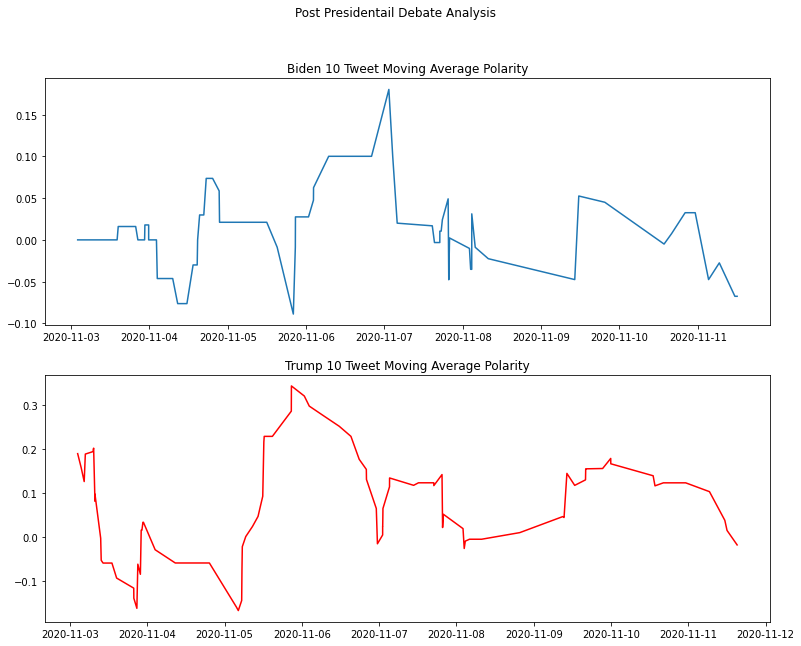

In [66]:
fig, axes = plt.subplots(2, 1, figsize=(13, 10))

axes[0].plot(biden['Timestamp'], biden['MA Polarity'])
axes[0].set_title("\n".join(['Biden 10 Tweet Moving Average Polarity']))

axes[1].plot(trump['Timestamp'], trump['MA Polarity'], color ='red')
axes[1].set_title("\n".join(['Trump 10 Tweet Moving Average Polarity']))

fig.suptitle('\n'.join(['Post Presidentail Debate Analysis']), y = 0.98)
plt.show()